<a href="https://colab.research.google.com/github/KAPILJHADE/Deep_Learning/blob/master/convolutional_nn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> CNN Classification on MNIST DATASET



In [1]:
from google.colab import drive
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import time
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

Check Available Device Type

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Download Dataset

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=0.1307,std=0.3081)])

train_set = torchvision.datasets.MNIST(root = "./dataset",train=True,download=True,transform=transform)  
test_set = torchvision.datasets.MNIST(root ="./dataset",train=False,download=True,transform=transform)

train_loader = torch.utils.data.DataLoader(train_set,batch_size=32,shuffle=True,num_workers=4)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=32,shuffle=True,num_workers=4)

Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw


Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw
Processing...



Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
data__ = enumerate(train_loader)
batch_id , (images,labels) = next(data__)

Displaying Image size

In [ ]:
images.shape

torch.Size([32, 1, 28, 28])

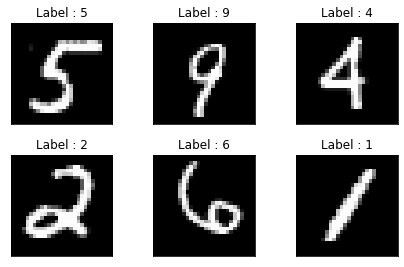

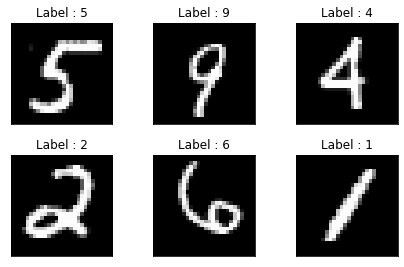

In [ ]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i][0], cmap='gray', interpolation='none')
  plt.title("Label : {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])
fig

Initialising 2-CN layers followed by relu and maxpool

In [ ]:
class Net(nn.Module):
    def __init__(self,num_classes=10):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(7 * 7 * 10, 100)
        self.fc2 = nn.Linear(100,num_classes)
    
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 7*7*10)
        x = self.fc1(x)
        return self.fc2(x)


Training the Neural Network

In [ ]:
model = Net()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=3e-4)
calculate_loss = nn.CrossEntropyLoss()
num_epochs = 800
since = time.time()
gradien_vector = []
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch, num_epochs - 1))
    print('-' * 10)
    model.train()
    running_loss = 0.0
    tk0 = tqdm(train_loader, total=int(len(train_loader)))
    counter = 0
    
    for batch_idx, data_set in enumerate(tk0):

        optimizer.zero_grad()    
        data , labels = data_set
        data = data.to(device)
        labels = labels.to(device)
        output = model(data)   
        output.to(device)
        loss = calculate_loss(output,labels) 
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * data.size(0)
        counter += 1
        tk0.set_postfix(loss=(running_loss / (counter * train_loader.batch_size)))
    
    
    g_2 = []
    for name, param in model.named_parameters():
        if param.requires_grad and "bias" not in name:
            g_2.append(torch.flatten(param.grad.data))
    print(torch.norm(torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)))
    gradien_vector.append(torch.norm(torch.cat([g_2[0],g_2[1],g_2[2],g_2[3]],dim=0)).item())

#printing time requires for the run
time_elapsed = time.time() - since
print('\nTraining completed in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
        


Epoch 0/799
----------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



tensor(2.0222, device='cuda:0')
Epoch 1/799
----------



tensor(1.2743, device='cuda:0')
Epoch 2/799
----------



tensor(2.3674, device='cuda:0')
Epoch 3/799
----------



tensor(0.4001, device='cuda:0')
Epoch 4/799
----------



tensor(0.8704, device='cuda:0')
Epoch 5/799
----------



tensor(0.5783, device='cuda:0')
Epoch 6/799
----------



tensor(0.9324, device='cuda:0')
Epoch 7/799
----------



tensor(0.1164, device='cuda:0')
Epoch 8/799
----------



tensor(0.9913, device='cuda:0')
Epoch 9/799
----------



tensor(2.9635, device='cuda:0')
Epoch 10/799
----------



tensor(0.5199, device='cuda:0')
Epoch 11/799
----------



tensor(2.0666, device='cuda:0')
Epoch 12/799
----------



tensor(1.3457, device='cuda:0')
Epoch 13/799
----------



tensor(0.5774, device='cuda:0')
Epoch 14/799
----------



tensor(0.0999, device='cuda:0')
Epoch 15/799
----------



tensor(1.5798, device='cuda:0')
Epoch 16/799
----------



tensor(3.2733, device='cuda:0')
Epoch 17/799
----------



tensor(2.6173, device='cuda:0')
Epoch 18/799
----------



tensor(0.2601, device='cuda:0')
Epoch 19/799
----------



tensor(0.2347, device='cuda:0')
Epoch 20/799
----------



tensor(1.0135, device='cuda:0')
Epoch 21/799
----------



tensor(1.3128, device='cuda:0')
Epoch 22/799
----------



tensor(0.0292, device='cuda:0')
Epoch 23/799
----------



tensor(3.0874, device='cuda:0')
Epoch 24/799
----------



tensor(0.3143, device='cuda:0')
Epoch 25/799
----------



tensor(0.0408, device='cuda:0')
Epoch 26/799
----------



tensor(0.0056, device='cuda:0')
Epoch 27/799
----------



tensor(0.0168, device='cuda:0')
Epoch 28/799
----------



tensor(1.9741, device='cuda:0')
Epoch 29/799
----------



tensor(0.3373, device='cuda:0')
Epoch 30/799
----------



tensor(1.1379, device='cuda:0')
Epoch 31/799
----------



tensor(0.3766, device='cuda:0')
Epoch 32/799
----------



tensor(0.0196, device='cuda:0')
Epoch 33/799
----------



tensor(0.0508, device='cuda:0')
Epoch 34/799
----------



tensor(0.6197, device='cuda:0')
Epoch 35/799
----------



tensor(0.1489, device='cuda:0')
Epoch 36/799
----------



tensor(0.6154, device='cuda:0')
Epoch 37/799
----------



tensor(0.6897, device='cuda:0')
Epoch 38/799
----------



tensor(0.2727, device='cuda:0')
Epoch 39/799
----------



tensor(0.0009, device='cuda:0')
Epoch 40/799
----------



tensor(0.0630, device='cuda:0')
Epoch 41/799
----------



tensor(0.5509, device='cuda:0')
Epoch 42/799
----------



tensor(0.2834, device='cuda:0')
Epoch 43/799
----------



tensor(3.4779, device='cuda:0')
Epoch 44/799
----------



tensor(0.0551, device='cuda:0')
Epoch 45/799
----------



tensor(2.7873, device='cuda:0')
Epoch 46/799
----------



tensor(0.0382, device='cuda:0')
Epoch 47/799
----------



tensor(0.0254, device='cuda:0')
Epoch 48/799
----------



tensor(3.0374, device='cuda:0')
Epoch 49/799
----------



tensor(5.2703, device='cuda:0')
Epoch 50/799
----------



tensor(1.6172, device='cuda:0')
Epoch 51/799
----------



tensor(1.5134, device='cuda:0')
Epoch 52/799
----------



tensor(3.9375, device='cuda:0')
Epoch 53/799
----------



tensor(4.1981, device='cuda:0')
Epoch 54/799
----------



tensor(0.0188, device='cuda:0')
Epoch 55/799
----------



tensor(3.5616, device='cuda:0')
Epoch 56/799
----------



tensor(0.0157, device='cuda:0')
Epoch 57/799
----------



tensor(4.1426, device='cuda:0')
Epoch 58/799
----------



tensor(0.2309, device='cuda:0')
Epoch 59/799
----------



tensor(0.0847, device='cuda:0')
Epoch 60/799
----------



tensor(2.4040, device='cuda:0')
Epoch 61/799
----------



tensor(0.1567, device='cuda:0')
Epoch 62/799
----------



tensor(0.0081, device='cuda:0')
Epoch 63/799
----------



tensor(0.2815, device='cuda:0')
Epoch 64/799
----------



tensor(0.4016, device='cuda:0')
Epoch 65/799
----------



tensor(3.6277, device='cuda:0')
Epoch 66/799
----------



tensor(0.8049, device='cuda:0')
Epoch 67/799
----------



tensor(0.0346, device='cuda:0')
Epoch 68/799
----------



tensor(0.1547, device='cuda:0')
Epoch 69/799
----------



tensor(0.0444, device='cuda:0')
Epoch 70/799
----------



tensor(0.0255, device='cuda:0')
Epoch 71/799
----------



tensor(0.3266, device='cuda:0')
Epoch 72/799
----------



tensor(0.1507, device='cuda:0')
Epoch 73/799
----------



tensor(4.8812, device='cuda:0')
Epoch 74/799
----------



tensor(4.4691, device='cuda:0')
Epoch 75/799
----------



tensor(1.0809, device='cuda:0')
Epoch 76/799
----------



tensor(0.0037, device='cuda:0')
Epoch 77/799
----------



tensor(0.0081, device='cuda:0')
Epoch 78/799
----------



tensor(0.0542, device='cuda:0')
Epoch 79/799
----------



tensor(0.0044, device='cuda:0')
Epoch 80/799
----------



tensor(0.0211, device='cuda:0')
Epoch 81/799
----------



tensor(1.1110, device='cuda:0')
Epoch 82/799
----------



tensor(0.0302, device='cuda:0')
Epoch 83/799
----------



tensor(0.0257, device='cuda:0')
Epoch 84/799
----------



tensor(1.2318, device='cuda:0')
Epoch 85/799
----------



tensor(0.3372, device='cuda:0')
Epoch 86/799
----------



tensor(0.0220, device='cuda:0')
Epoch 87/799
----------



tensor(0.0301, device='cuda:0')
Epoch 88/799
----------



tensor(0.0035, device='cuda:0')
Epoch 89/799
----------



tensor(0.2449, device='cuda:0')
Epoch 90/799
----------



tensor(2.3571e-05, device='cuda:0')
Epoch 91/799
----------



tensor(0.0181, device='cuda:0')
Epoch 92/799
----------



tensor(0.0478, device='cuda:0')
Epoch 93/799
----------



tensor(0.4441, device='cuda:0')
Epoch 94/799
----------



tensor(2.0610, device='cuda:0')
Epoch 95/799
----------



tensor(0.0017, device='cuda:0')
Epoch 96/799
----------



tensor(0.0151, device='cuda:0')
Epoch 97/799
----------



tensor(0.0101, device='cuda:0')
Epoch 98/799
----------



tensor(0.0009, device='cuda:0')
Epoch 99/799
----------



tensor(0.0489, device='cuda:0')
Epoch 100/799
----------



tensor(0.2816, device='cuda:0')
Epoch 101/799
----------



tensor(0.1720, device='cuda:0')
Epoch 102/799
----------



tensor(0.0003, device='cuda:0')
Epoch 103/799
----------



tensor(3.1074, device='cuda:0')
Epoch 104/799
----------



tensor(4.8037, device='cuda:0')
Epoch 105/799
----------



tensor(0.1676, device='cuda:0')
Epoch 106/799
----------



tensor(0.0065, device='cuda:0')
Epoch 107/799
----------



tensor(2.5252, device='cuda:0')
Epoch 108/799
----------



tensor(0.0038, device='cuda:0')
Epoch 109/799
----------



tensor(0.0354, device='cuda:0')
Epoch 110/799
----------



tensor(0.8945, device='cuda:0')
Epoch 111/799
----------



tensor(0.0004, device='cuda:0')
Epoch 112/799
----------



tensor(0.5367, device='cuda:0')
Epoch 113/799
----------



tensor(0.0045, device='cuda:0')
Epoch 114/799
----------



tensor(0.0013, device='cuda:0')
Epoch 115/799
----------



tensor(0.0039, device='cuda:0')
Epoch 116/799
----------



tensor(0.7982, device='cuda:0')
Epoch 117/799
----------



tensor(3.4598, device='cuda:0')
Epoch 118/799
----------



tensor(2.6356, device='cuda:0')
Epoch 119/799
----------



tensor(0.0237, device='cuda:0')
Epoch 120/799
----------



tensor(0.0625, device='cuda:0')
Epoch 121/799
----------



tensor(1.0081e-05, device='cuda:0')
Epoch 122/799
----------



tensor(3.6947, device='cuda:0')
Epoch 123/799
----------



tensor(0.2390, device='cuda:0')
Epoch 124/799
----------



tensor(4.7155e-05, device='cuda:0')
Epoch 125/799
----------



tensor(0.0280, device='cuda:0')
Epoch 126/799
----------



tensor(0.0002, device='cuda:0')
Epoch 127/799
----------



tensor(0.1563, device='cuda:0')
Epoch 128/799
----------



tensor(3.7389e-06, device='cuda:0')
Epoch 129/799
----------



tensor(0.0029, device='cuda:0')
Epoch 130/799
----------



tensor(0.3429, device='cuda:0')
Epoch 131/799
----------



tensor(0.0003, device='cuda:0')
Epoch 132/799
----------



tensor(0.5055, device='cuda:0')
Epoch 133/799
----------



tensor(1.9767, device='cuda:0')
Epoch 134/799
----------



tensor(0.0038, device='cuda:0')
Epoch 135/799
----------



tensor(0.0755, device='cuda:0')
Epoch 136/799
----------



tensor(2.1402e-06, device='cuda:0')
Epoch 137/799
----------



tensor(0.3688, device='cuda:0')
Epoch 138/799
----------



tensor(0.0010, device='cuda:0')
Epoch 139/799
----------



tensor(0.0015, device='cuda:0')
Epoch 140/799
----------



tensor(0.0010, device='cuda:0')
Epoch 141/799
----------



tensor(0.0373, device='cuda:0')
Epoch 142/799
----------



tensor(0.0149, device='cuda:0')
Epoch 143/799
----------



tensor(0.0471, device='cuda:0')
Epoch 144/799
----------



tensor(0.0084, device='cuda:0')
Epoch 145/799
----------



tensor(3.1604e-05, device='cuda:0')
Epoch 146/799
----------



tensor(0.0111, device='cuda:0')
Epoch 147/799
----------



tensor(0.0155, device='cuda:0')
Epoch 148/799
----------



tensor(3.1586, device='cuda:0')
Epoch 149/799
----------



tensor(0.0030, device='cuda:0')
Epoch 150/799
----------



tensor(0.0085, device='cuda:0')
Epoch 151/799
----------



tensor(8.5111e-05, device='cuda:0')
Epoch 152/799
----------



tensor(0.0005, device='cuda:0')
Epoch 153/799
----------



tensor(0.0066, device='cuda:0')
Epoch 154/799
----------



tensor(0.1650, device='cuda:0')
Epoch 155/799
----------



tensor(26.0030, device='cuda:0')
Epoch 156/799
----------



tensor(0.2652, device='cuda:0')
Epoch 157/799
----------



tensor(0.9639, device='cuda:0')
Epoch 158/799
----------



tensor(0.0010, device='cuda:0')
Epoch 159/799
----------



tensor(0.0340, device='cuda:0')
Epoch 160/799
----------



tensor(0.0145, device='cuda:0')
Epoch 161/799
----------



tensor(0.0179, device='cuda:0')
Epoch 162/799
----------



tensor(0.0014, device='cuda:0')
Epoch 163/799
----------



tensor(1.0882e-05, device='cuda:0')
Epoch 164/799
----------



tensor(0.0030, device='cuda:0')
Epoch 165/799
----------



tensor(0.0392, device='cuda:0')
Epoch 166/799
----------



tensor(0.0010, device='cuda:0')
Epoch 167/799
----------



tensor(0.0019, device='cuda:0')
Epoch 168/799
----------



tensor(0.0001, device='cuda:0')
Epoch 169/799
----------



tensor(0.1910, device='cuda:0')
Epoch 170/799
----------



tensor(3.4205e-05, device='cuda:0')
Epoch 171/799
----------



tensor(1.1014, device='cuda:0')
Epoch 172/799
----------



tensor(0.0004, device='cuda:0')
Epoch 173/799
----------



tensor(4.6065, device='cuda:0')
Epoch 174/799
----------



tensor(3.2585, device='cuda:0')
Epoch 175/799
----------



tensor(0.2238, device='cuda:0')
Epoch 176/799
----------



tensor(0.0001, device='cuda:0')
Epoch 177/799
----------



tensor(5.9885e-06, device='cuda:0')
Epoch 178/799
----------



tensor(1.7883e-05, device='cuda:0')
Epoch 179/799
----------



tensor(0.3736, device='cuda:0')
Epoch 180/799
----------



tensor(0.2601, device='cuda:0')
Epoch 181/799
----------



tensor(0.1963, device='cuda:0')
Epoch 182/799
----------



tensor(3.8646, device='cuda:0')
Epoch 183/799
----------



tensor(0.0011, device='cuda:0')
Epoch 184/799
----------



tensor(0.0016, device='cuda:0')
Epoch 185/799
----------



tensor(6.0427e-05, device='cuda:0')
Epoch 186/799
----------



tensor(0.0003, device='cuda:0')
Epoch 187/799
----------



tensor(5.5388e-06, device='cuda:0')
Epoch 188/799
----------



tensor(0.0113, device='cuda:0')
Epoch 189/799
----------



tensor(0.0296, device='cuda:0')
Epoch 190/799
----------



tensor(4.6377e-06, device='cuda:0')
Epoch 191/799
----------



tensor(0.0246, device='cuda:0')
Epoch 192/799
----------



tensor(2.5510e-05, device='cuda:0')
Epoch 193/799
----------



tensor(1.8243, device='cuda:0')
Epoch 194/799
----------



tensor(0.0002, device='cuda:0')
Epoch 195/799
----------



tensor(6.6927e-07, device='cuda:0')
Epoch 196/799
----------



tensor(2.0940, device='cuda:0')
Epoch 197/799
----------



tensor(9.8379e-07, device='cuda:0')
Epoch 198/799
----------



tensor(0.0428, device='cuda:0')
Epoch 199/799
----------



tensor(0.0045, device='cuda:0')
Epoch 200/799
----------



tensor(6.6496e-06, device='cuda:0')
Epoch 201/799
----------



tensor(0.0087, device='cuda:0')
Epoch 202/799
----------



tensor(8.2462e-05, device='cuda:0')
Epoch 203/799
----------



tensor(0.0711, device='cuda:0')
Epoch 204/799
----------



tensor(0.0031, device='cuda:0')
Epoch 205/799
----------



tensor(1.1037e-05, device='cuda:0')
Epoch 206/799
----------



tensor(0.0002, device='cuda:0')
Epoch 207/799
----------



tensor(0.0007, device='cuda:0')
Epoch 208/799
----------



tensor(3.2998e-05, device='cuda:0')
Epoch 209/799
----------



tensor(0.0020, device='cuda:0')
Epoch 210/799
----------



tensor(7.2837, device='cuda:0')
Epoch 211/799
----------



tensor(0.7588, device='cuda:0')
Epoch 212/799
----------



tensor(2.5530e-06, device='cuda:0')
Epoch 213/799
----------



tensor(0.0010, device='cuda:0')
Epoch 214/799
----------



tensor(2.6318e-06, device='cuda:0')
Epoch 215/799
----------



tensor(0.0035, device='cuda:0')
Epoch 216/799
----------



tensor(0.0428, device='cuda:0')
Epoch 217/799
----------



tensor(0.3255, device='cuda:0')
Epoch 218/799
----------



tensor(0.0203, device='cuda:0')
Epoch 219/799
----------



tensor(0.0442, device='cuda:0')
Epoch 220/799
----------



tensor(0.0044, device='cuda:0')
Epoch 221/799
----------



tensor(0.0046, device='cuda:0')
Epoch 222/799
----------



tensor(0.0004, device='cuda:0')
Epoch 223/799
----------



tensor(3.0058e-08, device='cuda:0')
Epoch 224/799
----------



tensor(0.3883, device='cuda:0')
Epoch 225/799
----------



tensor(0.0004, device='cuda:0')
Epoch 226/799
----------



tensor(0.0062, device='cuda:0')
Epoch 227/799
----------



tensor(0.0007, device='cuda:0')
Epoch 228/799
----------



tensor(2.3205e-12, device='cuda:0')
Epoch 229/799
----------



tensor(0.8728, device='cuda:0')
Epoch 230/799
----------



tensor(7.1226, device='cuda:0')
Epoch 231/799
----------



tensor(0.2555, device='cuda:0')
Epoch 232/799
----------



tensor(0.3479, device='cuda:0')
Epoch 233/799
----------



tensor(2.2812e-06, device='cuda:0')
Epoch 234/799
----------



tensor(0.0017, device='cuda:0')
Epoch 235/799
----------



tensor(0.0033, device='cuda:0')
Epoch 236/799
----------



tensor(2.8685e-06, device='cuda:0')
Epoch 237/799
----------



tensor(0.0001, device='cuda:0')
Epoch 238/799
----------



tensor(0.0169, device='cuda:0')
Epoch 239/799
----------



tensor(0.6645, device='cuda:0')
Epoch 240/799
----------



tensor(0.0011, device='cuda:0')
Epoch 241/799
----------



tensor(0.6650, device='cuda:0')
Epoch 242/799
----------



tensor(4.6046e-09, device='cuda:0')
Epoch 243/799
----------



tensor(1.6527e-09, device='cuda:0')
Epoch 244/799
----------



tensor(0.0108, device='cuda:0')
Epoch 245/799
----------



tensor(3.6480e-05, device='cuda:0')
Epoch 246/799
----------



tensor(0.0006, device='cuda:0')
Epoch 247/799
----------



tensor(4.6215e-06, device='cuda:0')
Epoch 248/799
----------



tensor(0.0056, device='cuda:0')
Epoch 249/799
----------



tensor(0.0017, device='cuda:0')
Epoch 250/799
----------



tensor(3.6734e-07, device='cuda:0')
Epoch 251/799
----------



tensor(4.2537e-05, device='cuda:0')
Epoch 252/799
----------



tensor(3.3208, device='cuda:0')
Epoch 253/799
----------



tensor(1.0094, device='cuda:0')
Epoch 254/799
----------



tensor(4.8790e-10, device='cuda:0')
Epoch 255/799
----------



tensor(0.0349, device='cuda:0')
Epoch 256/799
----------



tensor(0.0003, device='cuda:0')
Epoch 257/799
----------



tensor(0.0014, device='cuda:0')
Epoch 258/799
----------



tensor(0.0873, device='cuda:0')
Epoch 259/799
----------



tensor(0.2634, device='cuda:0')
Epoch 260/799
----------



tensor(8.6433e-05, device='cuda:0')
Epoch 261/799
----------



tensor(0.0020, device='cuda:0')
Epoch 262/799
----------



tensor(6.8807e-05, device='cuda:0')
Epoch 263/799
----------



tensor(0.0740, device='cuda:0')
Epoch 264/799
----------



tensor(6.6793e-05, device='cuda:0')
Epoch 265/799
----------



tensor(2.5970e-05, device='cuda:0')
Epoch 266/799
----------



tensor(0.0033, device='cuda:0')
Epoch 267/799
----------



tensor(0.0290, device='cuda:0')
Epoch 268/799
----------



tensor(0.0118, device='cuda:0')
Epoch 269/799
----------



tensor(0.0281, device='cuda:0')
Epoch 270/799
----------



tensor(9.0750e-05, device='cuda:0')
Epoch 271/799
----------



tensor(5.5782e-06, device='cuda:0')
Epoch 272/799
----------



tensor(2.4101e-05, device='cuda:0')
Epoch 273/799
----------



tensor(4.5398, device='cuda:0')
Epoch 274/799
----------



tensor(0.0078, device='cuda:0')
Epoch 275/799
----------



tensor(1.2023, device='cuda:0')
Epoch 276/799
----------



tensor(0.0026, device='cuda:0')
Epoch 277/799
----------



tensor(0.1179, device='cuda:0')
Epoch 278/799
----------



tensor(4.7996e-08, device='cuda:0')
Epoch 279/799
----------



tensor(1.2471e-05, device='cuda:0')
Epoch 280/799
----------



tensor(0.0123, device='cuda:0')
Epoch 281/799
----------



tensor(0.0123, device='cuda:0')
Epoch 282/799
----------



tensor(2.6898e-09, device='cuda:0')
Epoch 283/799
----------



tensor(1.5314e-07, device='cuda:0')
Epoch 284/799
----------



tensor(0.0047, device='cuda:0')
Epoch 285/799
----------



tensor(0.0009, device='cuda:0')
Epoch 286/799
----------



tensor(0.0001, device='cuda:0')
Epoch 287/799
----------



tensor(0.0038, device='cuda:0')
Epoch 288/799
----------



tensor(4.4548e-06, device='cuda:0')
Epoch 289/799
----------



tensor(0.0015, device='cuda:0')
Epoch 290/799
----------



tensor(0.0105, device='cuda:0')
Epoch 291/799
----------



tensor(0.0007, device='cuda:0')
Epoch 292/799
----------



tensor(6.2161e-10, device='cuda:0')
Epoch 293/799
----------



tensor(1.7713, device='cuda:0')
Epoch 294/799
----------



tensor(0.0008, device='cuda:0')
Epoch 295/799
----------



tensor(0.0001, device='cuda:0')
Epoch 296/799
----------



tensor(0.0003, device='cuda:0')
Epoch 297/799
----------



tensor(0.0002, device='cuda:0')
Epoch 298/799
----------



tensor(0.0268, device='cuda:0')
Epoch 299/799
----------



tensor(5.0243e-05, device='cuda:0')
Epoch 300/799
----------



tensor(0.0034, device='cuda:0')
Epoch 301/799
----------



tensor(0.0036, device='cuda:0')
Epoch 302/799
----------



tensor(6.2070e-09, device='cuda:0')
Epoch 303/799
----------



tensor(2.9040e-06, device='cuda:0')
Epoch 304/799
----------



tensor(0.0085, device='cuda:0')
Epoch 305/799
----------



tensor(3.7572e-08, device='cuda:0')
Epoch 306/799
----------



tensor(0.0046, device='cuda:0')
Epoch 307/799
----------



tensor(0.0038, device='cuda:0')
Epoch 308/799
----------



tensor(1.7215e-06, device='cuda:0')
Epoch 309/799
----------



tensor(0.3705, device='cuda:0')
Epoch 310/799
----------



tensor(0.0500, device='cuda:0')
Epoch 311/799
----------



tensor(7.2643e-07, device='cuda:0')
Epoch 312/799
----------



tensor(9.4342, device='cuda:0')
Epoch 313/799
----------



tensor(1.8761, device='cuda:0')
Epoch 314/799
----------



tensor(6.0679e-05, device='cuda:0')
Epoch 315/799
----------



tensor(5.9760e-06, device='cuda:0')
Epoch 316/799
----------



tensor(0.0225, device='cuda:0')
Epoch 317/799
----------



tensor(0.2252, device='cuda:0')
Epoch 318/799
----------



tensor(0.9461, device='cuda:0')
Epoch 319/799
----------



tensor(2.9661e-07, device='cuda:0')
Epoch 320/799
----------



tensor(7.7952e-08, device='cuda:0')
Epoch 321/799
----------



tensor(8.1750e-05, device='cuda:0')
Epoch 322/799
----------



tensor(0.0033, device='cuda:0')
Epoch 323/799
----------



tensor(9.3997, device='cuda:0')
Epoch 324/799
----------



tensor(1.6081e-08, device='cuda:0')
Epoch 325/799
----------



tensor(0.0003, device='cuda:0')
Epoch 326/799
----------



tensor(0.0695, device='cuda:0')
Epoch 327/799
----------



tensor(1.5004e-06, device='cuda:0')
Epoch 328/799
----------



tensor(0.0102, device='cuda:0')
Epoch 329/799
----------



tensor(1.2074e-06, device='cuda:0')
Epoch 330/799
----------



tensor(1.3907e-05, device='cuda:0')
Epoch 331/799
----------



tensor(0.4505, device='cuda:0')
Epoch 332/799
----------



tensor(0.0033, device='cuda:0')
Epoch 333/799
----------



tensor(0.0449, device='cuda:0')
Epoch 334/799
----------



tensor(6.7869e-05, device='cuda:0')
Epoch 335/799
----------



tensor(0.0001, device='cuda:0')
Epoch 336/799
----------



tensor(6.7334, device='cuda:0')
Epoch 337/799
----------



tensor(6.7223e-11, device='cuda:0')
Epoch 338/799
----------



tensor(8.2928e-06, device='cuda:0')
Epoch 339/799
----------



tensor(0.7809, device='cuda:0')
Epoch 340/799
----------



tensor(9.4558e-06, device='cuda:0')
Epoch 341/799
----------



tensor(0.0060, device='cuda:0')
Epoch 342/799
----------



tensor(0.0018, device='cuda:0')
Epoch 343/799
----------



tensor(7.5362e-11, device='cuda:0')
Epoch 344/799
----------



tensor(5.4725e-09, device='cuda:0')
Epoch 345/799
----------



tensor(0.0068, device='cuda:0')
Epoch 346/799
----------



tensor(0.0007, device='cuda:0')
Epoch 347/799
----------



tensor(2.9320, device='cuda:0')
Epoch 348/799
----------



tensor(5.7735e-09, device='cuda:0')
Epoch 349/799
----------



tensor(1.0457e-06, device='cuda:0')
Epoch 350/799
----------



tensor(0.0036, device='cuda:0')
Epoch 351/799
----------



tensor(7.2125e-06, device='cuda:0')
Epoch 352/799
----------



tensor(1.0965e-06, device='cuda:0')
Epoch 353/799
----------



tensor(0.0073, device='cuda:0')
Epoch 354/799
----------



tensor(0.0323, device='cuda:0')
Epoch 355/799
----------



tensor(0.0108, device='cuda:0')
Epoch 356/799
----------



tensor(4.1609e-05, device='cuda:0')
Epoch 357/799
----------



tensor(0.0564, device='cuda:0')
Epoch 358/799
----------



tensor(1.5645, device='cuda:0')
Epoch 359/799
----------



tensor(0.0006, device='cuda:0')
Epoch 360/799
----------



tensor(2.3255e-05, device='cuda:0')
Epoch 361/799
----------



tensor(1.1728, device='cuda:0')
Epoch 362/799
----------



tensor(0.0007, device='cuda:0')
Epoch 363/799
----------



tensor(0.0020, device='cuda:0')
Epoch 364/799
----------



tensor(1.8954, device='cuda:0')
Epoch 365/799
----------



tensor(1.1211e-07, device='cuda:0')
Epoch 366/799
----------



tensor(3.2421e-10, device='cuda:0')
Epoch 367/799
----------



tensor(0.0034, device='cuda:0')
Epoch 368/799
----------



tensor(4.5708e-06, device='cuda:0')
Epoch 369/799
----------



tensor(0.0193, device='cuda:0')
Epoch 370/799
----------



tensor(0.6858, device='cuda:0')
Epoch 371/799
----------



tensor(7.8517e-11, device='cuda:0')
Epoch 372/799
----------



tensor(0.0006, device='cuda:0')
Epoch 373/799
----------



tensor(1.4799e-05, device='cuda:0')
Epoch 374/799
----------



tensor(0.0322, device='cuda:0')
Epoch 375/799
----------



tensor(0.2685, device='cuda:0')
Epoch 376/799
----------



tensor(0.0002, device='cuda:0')
Epoch 377/799
----------



tensor(6.2902e-08, device='cuda:0')
Epoch 378/799
----------



tensor(0.1010, device='cuda:0')
Epoch 379/799
----------



tensor(7.6860e-12, device='cuda:0')
Epoch 380/799
----------



tensor(0.0395, device='cuda:0')
Epoch 381/799
----------



tensor(9.3379, device='cuda:0')
Epoch 382/799
----------



tensor(0.0301, device='cuda:0')
Epoch 383/799
----------



tensor(0.0001, device='cuda:0')
Epoch 384/799
----------



tensor(8.4736e-06, device='cuda:0')
Epoch 385/799
----------



tensor(0.0002, device='cuda:0')
Epoch 386/799
----------



tensor(2.4120e-06, device='cuda:0')
Epoch 387/799
----------



tensor(4.2888e-07, device='cuda:0')
Epoch 388/799
----------



tensor(5.5553e-09, device='cuda:0')
Epoch 389/799
----------



tensor(8.9678e-05, device='cuda:0')
Epoch 390/799
----------



tensor(0.2817, device='cuda:0')
Epoch 391/799
----------



tensor(0.8163, device='cuda:0')
Epoch 392/799
----------



tensor(0.0009, device='cuda:0')
Epoch 393/799
----------



tensor(3.1395, device='cuda:0')
Epoch 394/799
----------



tensor(6.0733e-08, device='cuda:0')
Epoch 395/799
----------



tensor(0.0002, device='cuda:0')
Epoch 396/799
----------



tensor(0.0008, device='cuda:0')
Epoch 397/799
----------



tensor(0.0017, device='cuda:0')
Epoch 398/799
----------



tensor(0.0002, device='cuda:0')
Epoch 399/799
----------



tensor(0.0002, device='cuda:0')
Epoch 400/799
----------



tensor(6.0425e-05, device='cuda:0')
Epoch 401/799
----------



tensor(9.1270e-09, device='cuda:0')
Epoch 402/799
----------



tensor(6.2581e-10, device='cuda:0')
Epoch 403/799
----------



tensor(2.1904, device='cuda:0')
Epoch 404/799
----------



tensor(4.5545e-06, device='cuda:0')
Epoch 405/799
----------



tensor(0.7875, device='cuda:0')
Epoch 406/799
----------



tensor(3.2423e-05, device='cuda:0')
Epoch 407/799
----------



tensor(0.0243, device='cuda:0')
Epoch 408/799
----------



tensor(3.4990, device='cuda:0')
Epoch 409/799
----------



tensor(1.4056e-07, device='cuda:0')
Epoch 410/799
----------



tensor(8.7058e-13, device='cuda:0')
Epoch 411/799
----------



tensor(1.4021e-08, device='cuda:0')
Epoch 412/799
----------



tensor(0.0059, device='cuda:0')
Epoch 413/799
----------



tensor(2.4037e-05, device='cuda:0')
Epoch 414/799
----------



tensor(3.1023, device='cuda:0')
Epoch 415/799
----------



tensor(3.6786e-10, device='cuda:0')
Epoch 416/799
----------



tensor(0.0007, device='cuda:0')
Epoch 417/799
----------



tensor(0.0704, device='cuda:0')
Epoch 418/799
----------



tensor(0.0121, device='cuda:0')
Epoch 419/799
----------



tensor(4.9599e-06, device='cuda:0')
Epoch 420/799
----------



tensor(0.0027, device='cuda:0')
Epoch 421/799
----------



tensor(2.2809e-06, device='cuda:0')
Epoch 422/799
----------



tensor(0.0066, device='cuda:0')
Epoch 423/799
----------



tensor(1.6375e-06, device='cuda:0')
Epoch 424/799
----------



tensor(1.4132e-05, device='cuda:0')
Epoch 425/799
----------



tensor(0.0037, device='cuda:0')
Epoch 426/799
----------



tensor(1.2467e-09, device='cuda:0')
Epoch 427/799
----------



tensor(6.8965e-08, device='cuda:0')
Epoch 428/799
----------



tensor(0.0526, device='cuda:0')
Epoch 429/799
----------



tensor(0.0284, device='cuda:0')
Epoch 430/799
----------



tensor(2.1573e-08, device='cuda:0')
Epoch 431/799
----------



tensor(0.0103, device='cuda:0')
Epoch 432/799
----------



tensor(1.4175e-05, device='cuda:0')
Epoch 433/799
----------



tensor(0.0016, device='cuda:0')
Epoch 434/799
----------



tensor(6.4098e-05, device='cuda:0')
Epoch 435/799
----------



tensor(5.4201e-11, device='cuda:0')
Epoch 436/799
----------



tensor(4.8664, device='cuda:0')
Epoch 437/799
----------



tensor(9.6266e-07, device='cuda:0')
Epoch 438/799
----------



tensor(9.0277, device='cuda:0')
Epoch 439/799
----------



tensor(13.8379, device='cuda:0')
Epoch 440/799
----------



tensor(1.3210e-08, device='cuda:0')
Epoch 441/799
----------



tensor(0.0277, device='cuda:0')
Epoch 442/799
----------



tensor(9.1261e-06, device='cuda:0')
Epoch 443/799
----------



tensor(2.2846e-05, device='cuda:0')
Epoch 444/799
----------



tensor(0.0054, device='cuda:0')
Epoch 445/799
----------



tensor(0.5735, device='cuda:0')
Epoch 446/799
----------



tensor(6.2980e-10, device='cuda:0')
Epoch 447/799
----------



tensor(0.2720, device='cuda:0')
Epoch 448/799
----------



tensor(1.4615e-06, device='cuda:0')
Epoch 449/799
----------



tensor(7.9328e-05, device='cuda:0')
Epoch 450/799
----------



tensor(4.5115e-06, device='cuda:0')
Epoch 451/799
----------



tensor(1.1690e-06, device='cuda:0')
Epoch 452/799
----------



tensor(0.0017, device='cuda:0')
Epoch 453/799
----------



tensor(4.3750e-08, device='cuda:0')
Epoch 454/799
----------



tensor(0.0029, device='cuda:0')
Epoch 455/799
----------



tensor(1.2141e-05, device='cuda:0')
Epoch 456/799
----------



tensor(2.2005e-05, device='cuda:0')
Epoch 457/799
----------



tensor(0.0018, device='cuda:0')
Epoch 458/799
----------



tensor(0.9385, device='cuda:0')
Epoch 459/799
----------



tensor(2.7385e-10, device='cuda:0')
Epoch 460/799
----------



tensor(0.0010, device='cuda:0')
Epoch 461/799
----------



tensor(7.1276e-09, device='cuda:0')
Epoch 462/799
----------



tensor(0.0128, device='cuda:0')
Epoch 463/799
----------



tensor(0.0003, device='cuda:0')
Epoch 464/799
----------



tensor(1.7018e-05, device='cuda:0')
Epoch 465/799
----------



tensor(0.0102, device='cuda:0')
Epoch 466/799
----------



tensor(0.0054, device='cuda:0')
Epoch 467/799
----------



tensor(4.4412e-11, device='cuda:0')
Epoch 468/799
----------



tensor(0.0180, device='cuda:0')
Epoch 469/799
----------



tensor(0.0173, device='cuda:0')
Epoch 470/799
----------



tensor(8.6328e-08, device='cuda:0')
Epoch 471/799
----------



tensor(3.3729e-08, device='cuda:0')
Epoch 472/799
----------



tensor(7.4299e-05, device='cuda:0')
Epoch 473/799
----------



tensor(9.7903e-06, device='cuda:0')
Epoch 474/799
----------



tensor(1.4867e-16, device='cuda:0')
Epoch 475/799
----------



tensor(1.6527e-05, device='cuda:0')
Epoch 476/799
----------



tensor(0.0023, device='cuda:0')
Epoch 477/799
----------



tensor(1.8521e-05, device='cuda:0')
Epoch 478/799
----------



tensor(0.0624, device='cuda:0')
Epoch 479/799
----------



tensor(0.0560, device='cuda:0')
Epoch 480/799
----------



tensor(0.4041, device='cuda:0')
Epoch 481/799
----------



tensor(0.0001, device='cuda:0')
Epoch 482/799
----------



tensor(2.4013e-05, device='cuda:0')
Epoch 483/799
----------



tensor(1.2471e-08, device='cuda:0')
Epoch 484/799
----------



tensor(0.0009, device='cuda:0')
Epoch 485/799
----------



tensor(1.2377e-11, device='cuda:0')
Epoch 486/799
----------



tensor(2.0472e-07, device='cuda:0')
Epoch 487/799
----------



tensor(6.2258e-05, device='cuda:0')
Epoch 488/799
----------



tensor(4.4809e-08, device='cuda:0')
Epoch 489/799
----------



tensor(0.1579, device='cuda:0')
Epoch 490/799
----------



tensor(3.7663e-07, device='cuda:0')
Epoch 491/799
----------



tensor(0.0042, device='cuda:0')
Epoch 492/799
----------



tensor(7.7994e-06, device='cuda:0')
Epoch 493/799
----------



tensor(0.0002, device='cuda:0')
Epoch 494/799
----------



tensor(2.6565, device='cuda:0')
Epoch 495/799
----------



tensor(7.5703e-06, device='cuda:0')
Epoch 496/799
----------



tensor(0.0072, device='cuda:0')
Epoch 497/799
----------



tensor(1.1520e-06, device='cuda:0')
Epoch 498/799
----------



tensor(2.3950e-08, device='cuda:0')
Epoch 499/799
----------



tensor(1.7329e-07, device='cuda:0')
Epoch 500/799
----------



tensor(2.3030e-08, device='cuda:0')
Epoch 501/799
----------



tensor(7.6475e-06, device='cuda:0')
Epoch 502/799
----------



tensor(3.0083e-05, device='cuda:0')
Epoch 503/799
----------



tensor(0.0015, device='cuda:0')
Epoch 504/799
----------



tensor(1.9106e-06, device='cuda:0')
Epoch 505/799
----------



tensor(4.4878e-11, device='cuda:0')
Epoch 506/799
----------



tensor(1.6831e-05, device='cuda:0')
Epoch 507/799
----------



tensor(0.1260, device='cuda:0')
Epoch 508/799
----------



tensor(1.7222e-06, device='cuda:0')
Epoch 509/799
----------



tensor(0.0174, device='cuda:0')
Epoch 510/799
----------



tensor(4.3008, device='cuda:0')
Epoch 511/799
----------



tensor(0.0737, device='cuda:0')
Epoch 512/799
----------



tensor(6.9369e-12, device='cuda:0')
Epoch 513/799
----------



tensor(0.0344, device='cuda:0')
Epoch 514/799
----------



tensor(1.9577e-14, device='cuda:0')
Epoch 515/799
----------



tensor(2.8020e-09, device='cuda:0')
Epoch 516/799
----------



tensor(3.0159e-07, device='cuda:0')
Epoch 517/799
----------



tensor(0.1022, device='cuda:0')
Epoch 518/799
----------



tensor(0.0050, device='cuda:0')
Epoch 519/799
----------



tensor(0.0077, device='cuda:0')
Epoch 520/799
----------



tensor(0.0057, device='cuda:0')
Epoch 521/799
----------



tensor(0.0180, device='cuda:0')
Epoch 522/799
----------



tensor(7.8010e-09, device='cuda:0')
Epoch 523/799
----------



tensor(0.2399, device='cuda:0')
Epoch 524/799
----------



tensor(0.0011, device='cuda:0')
Epoch 525/799
----------



tensor(2.1738e-07, device='cuda:0')
Epoch 526/799
----------



tensor(1.0783e-05, device='cuda:0')
Epoch 527/799
----------



tensor(0.0759, device='cuda:0')
Epoch 528/799
----------



tensor(1.1388e-06, device='cuda:0')
Epoch 529/799
----------



tensor(8.8339e-05, device='cuda:0')
Epoch 530/799
----------



tensor(0.0011, device='cuda:0')
Epoch 531/799
----------



tensor(0.0002, device='cuda:0')
Epoch 532/799
----------



tensor(1.0039e-05, device='cuda:0')
Epoch 533/799
----------



tensor(0.0003, device='cuda:0')
Epoch 534/799
----------



tensor(1.8193e-09, device='cuda:0')
Epoch 535/799
----------



tensor(0.0009, device='cuda:0')
Epoch 536/799
----------



tensor(0.0013, device='cuda:0')
Epoch 537/799
----------



tensor(6.9558e-06, device='cuda:0')
Epoch 538/799
----------



tensor(7.0211e-13, device='cuda:0')
Epoch 539/799
----------



tensor(0.1493, device='cuda:0')
Epoch 540/799
----------



tensor(5.6880e-05, device='cuda:0')
Epoch 541/799
----------



tensor(0.1629, device='cuda:0')
Epoch 542/799
----------



tensor(1.2799e-07, device='cuda:0')
Epoch 543/799
----------



tensor(0.0329, device='cuda:0')
Epoch 544/799
----------



tensor(2.7730e-10, device='cuda:0')
Epoch 545/799
----------



tensor(0.0275, device='cuda:0')
Epoch 546/799
----------



tensor(0.1069, device='cuda:0')
Epoch 547/799
----------



tensor(0.0002, device='cuda:0')
Epoch 548/799
----------



tensor(0.0009, device='cuda:0')
Epoch 549/799
----------



tensor(0.0067, device='cuda:0')
Epoch 550/799
----------



tensor(2.5322e-08, device='cuda:0')
Epoch 551/799
----------



tensor(0.0051, device='cuda:0')
Epoch 552/799
----------



tensor(6.9464e-06, device='cuda:0')
Epoch 553/799
----------



tensor(2.1652e-07, device='cuda:0')
Epoch 554/799
----------



tensor(0.7897, device='cuda:0')
Epoch 555/799
----------



tensor(8.4826, device='cuda:0')
Epoch 556/799
----------



tensor(3.4252e-05, device='cuda:0')
Epoch 557/799
----------



tensor(0.0010, device='cuda:0')
Epoch 558/799
----------



tensor(1.1055e-06, device='cuda:0')
Epoch 559/799
----------



tensor(0.0033, device='cuda:0')
Epoch 560/799
----------



tensor(0.0012, device='cuda:0')
Epoch 561/799
----------



tensor(0.0104, device='cuda:0')
Epoch 562/799
----------



tensor(1.4334e-09, device='cuda:0')
Epoch 563/799
----------



tensor(2.3408e-08, device='cuda:0')
Epoch 564/799
----------



tensor(2.8491e-06, device='cuda:0')
Epoch 565/799
----------



tensor(1.7687e-08, device='cuda:0')
Epoch 566/799
----------



tensor(1.1884e-05, device='cuda:0')
Epoch 567/799
----------



tensor(3.0048e-08, device='cuda:0')
Epoch 568/799
----------



tensor(8.1430e-06, device='cuda:0')
Epoch 569/799
----------



tensor(0.0102, device='cuda:0')
Epoch 570/799
----------



tensor(2.0503e-09, device='cuda:0')
Epoch 571/799
----------



tensor(0.4759, device='cuda:0')
Epoch 572/799
----------



tensor(3.9968e-10, device='cuda:0')
Epoch 573/799
----------



tensor(0.0003, device='cuda:0')
Epoch 574/799
----------



tensor(7.8660e-06, device='cuda:0')
Epoch 575/799
----------



tensor(1.0176e-06, device='cuda:0')
Epoch 576/799
----------



tensor(1.4920e-06, device='cuda:0')
Epoch 577/799
----------



tensor(1.6602e-05, device='cuda:0')
Epoch 578/799
----------



tensor(0.8252, device='cuda:0')
Epoch 579/799
----------



tensor(0.0001, device='cuda:0')
Epoch 580/799
----------



tensor(2.3109e-07, device='cuda:0')
Epoch 581/799
----------



tensor(1.0057e-07, device='cuda:0')
Epoch 582/799
----------



tensor(3.1239e-05, device='cuda:0')
Epoch 583/799
----------



tensor(1.6397e-07, device='cuda:0')
Epoch 584/799
----------



tensor(5.1201e-05, device='cuda:0')
Epoch 585/799
----------



tensor(0.0055, device='cuda:0')
Epoch 586/799
----------



tensor(5.8953e-08, device='cuda:0')
Epoch 587/799
----------



tensor(4.0628, device='cuda:0')
Epoch 588/799
----------



tensor(1.4947e-09, device='cuda:0')
Epoch 589/799
----------



tensor(0.1541, device='cuda:0')
Epoch 590/799
----------



tensor(0.0002, device='cuda:0')
Epoch 591/799
----------



tensor(6.6536e-06, device='cuda:0')
Epoch 592/799
----------



tensor(0.0001, device='cuda:0')
Epoch 593/799
----------



tensor(0.0004, device='cuda:0')
Epoch 594/799
----------



tensor(0.0003, device='cuda:0')
Epoch 595/799
----------



tensor(0.0350, device='cuda:0')
Epoch 596/799
----------



tensor(8.9599e-13, device='cuda:0')
Epoch 597/799
----------



tensor(1.2519e-05, device='cuda:0')
Epoch 598/799
----------



tensor(7.1264e-06, device='cuda:0')
Epoch 599/799
----------



tensor(2.3836e-06, device='cuda:0')
Epoch 600/799
----------



tensor(2.2743e-05, device='cuda:0')
Epoch 601/799
----------



tensor(9.7527e-09, device='cuda:0')
Epoch 602/799
----------



tensor(9.2625e-05, device='cuda:0')
Epoch 603/799
----------



tensor(1.0779e-06, device='cuda:0')
Epoch 604/799
----------



tensor(2.9373e-09, device='cuda:0')
Epoch 605/799
----------



tensor(3.6973e-07, device='cuda:0')
Epoch 606/799
----------



tensor(0.0027, device='cuda:0')
Epoch 607/799
----------



tensor(1.6109e-10, device='cuda:0')
Epoch 608/799
----------



tensor(5.7400e-08, device='cuda:0')
Epoch 609/799
----------



tensor(0.6690, device='cuda:0')
Epoch 610/799
----------



tensor(0.0008, device='cuda:0')
Epoch 611/799
----------



tensor(7.2795e-06, device='cuda:0')
Epoch 612/799
----------



tensor(3.3687e-05, device='cuda:0')
Epoch 613/799
----------



tensor(3.7168e-06, device='cuda:0')
Epoch 614/799
----------



tensor(9.7355e-05, device='cuda:0')
Epoch 615/799
----------



tensor(0.0003, device='cuda:0')
Epoch 616/799
----------



tensor(7.8610e-09, device='cuda:0')
Epoch 617/799
----------



tensor(5.2004e-05, device='cuda:0')
Epoch 618/799
----------



tensor(2.6915e-08, device='cuda:0')
Epoch 619/799
----------



tensor(1.8882e-07, device='cuda:0')
Epoch 620/799
----------



tensor(0.0002, device='cuda:0')
Epoch 621/799
----------



tensor(7.9091e-10, device='cuda:0')
Epoch 622/799
----------



tensor(0.0002, device='cuda:0')
Epoch 623/799
----------



tensor(2.9383e-06, device='cuda:0')
Epoch 624/799
----------



tensor(0.0003, device='cuda:0')
Epoch 625/799
----------



tensor(3.0600e-10, device='cuda:0')
Epoch 626/799
----------



tensor(4.2700e-07, device='cuda:0')
Epoch 627/799
----------



tensor(0.0035, device='cuda:0')
Epoch 628/799
----------



tensor(8.5024e-15, device='cuda:0')
Epoch 629/799
----------



tensor(0.0058, device='cuda:0')
Epoch 630/799
----------



tensor(8.3320e-11, device='cuda:0')
Epoch 631/799
----------



tensor(4.1314e-09, device='cuda:0')
Epoch 632/799
----------



tensor(7.2788e-08, device='cuda:0')
Epoch 633/799
----------



tensor(0.0009, device='cuda:0')
Epoch 634/799
----------



tensor(0.0014, device='cuda:0')
Epoch 635/799
----------



tensor(1.3611e-11, device='cuda:0')
Epoch 636/799
----------



tensor(2.8929e-07, device='cuda:0')
Epoch 637/799
----------



tensor(2.1128e-05, device='cuda:0')
Epoch 638/799
----------



tensor(1.2248e-10, device='cuda:0')
Epoch 639/799
----------



tensor(0.0018, device='cuda:0')
Epoch 640/799
----------



tensor(7.9011e-08, device='cuda:0')
Epoch 641/799
----------



tensor(1.9331e-13, device='cuda:0')
Epoch 642/799
----------



tensor(0.9896, device='cuda:0')
Epoch 643/799
----------



tensor(1.6802e-05, device='cuda:0')
Epoch 644/799
----------



tensor(6.8242e-17, device='cuda:0')
Epoch 645/799
----------



tensor(1.8563e-09, device='cuda:0')
Epoch 646/799
----------



tensor(0.5416, device='cuda:0')
Epoch 647/799
----------



tensor(6.9861e-06, device='cuda:0')
Epoch 648/799
----------



tensor(0.0005, device='cuda:0')
Epoch 649/799
----------



tensor(0.0001, device='cuda:0')
Epoch 650/799
----------



tensor(5.1400e-10, device='cuda:0')
Epoch 651/799
----------



tensor(9.2406e-06, device='cuda:0')
Epoch 652/799
----------



tensor(2.4453e-05, device='cuda:0')
Epoch 653/799
----------



tensor(0.0242, device='cuda:0')
Epoch 654/799
----------



tensor(0.0114, device='cuda:0')
Epoch 655/799
----------



tensor(0.0620, device='cuda:0')
Epoch 656/799
----------



tensor(13.6676, device='cuda:0')
Epoch 657/799
----------



tensor(3.2256e-06, device='cuda:0')
Epoch 658/799
----------



tensor(0.0005, device='cuda:0')
Epoch 659/799
----------



tensor(6.2051e-10, device='cuda:0')
Epoch 660/799
----------



tensor(1.5074e-07, device='cuda:0')
Epoch 661/799
----------



tensor(1.6102e-07, device='cuda:0')
Epoch 662/799
----------



tensor(1.9870e-10, device='cuda:0')
Epoch 663/799
----------



tensor(1.3185e-06, device='cuda:0')
Epoch 664/799
----------



tensor(7.6169e-05, device='cuda:0')
Epoch 665/799
----------



tensor(0.0541, device='cuda:0')
Epoch 666/799
----------



tensor(0.0192, device='cuda:0')
Epoch 667/799
----------



tensor(0.0004, device='cuda:0')
Epoch 668/799
----------



tensor(0.0036, device='cuda:0')
Epoch 669/799
----------



tensor(8.3952e-14, device='cuda:0')
Epoch 670/799
----------



tensor(0.0154, device='cuda:0')
Epoch 671/799
----------



tensor(4.4793e-10, device='cuda:0')
Epoch 672/799
----------



tensor(0.0030, device='cuda:0')
Epoch 673/799
----------



tensor(3.9982e-05, device='cuda:0')
Epoch 674/799
----------



tensor(9.5705e-07, device='cuda:0')
Epoch 675/799
----------



tensor(4.8999e-14, device='cuda:0')
Epoch 676/799
----------



tensor(3.7343e-05, device='cuda:0')
Epoch 677/799
----------



tensor(14.0847, device='cuda:0')
Epoch 678/799
----------



tensor(0.0002, device='cuda:0')
Epoch 679/799
----------



tensor(10.4374, device='cuda:0')
Epoch 680/799
----------



tensor(0.0002, device='cuda:0')
Epoch 681/799
----------



tensor(4.8542e-09, device='cuda:0')
Epoch 682/799
----------



tensor(2.2422e-05, device='cuda:0')
Epoch 683/799
----------



tensor(4.0411e-11, device='cuda:0')
Epoch 684/799
----------



tensor(0.0013, device='cuda:0')
Epoch 685/799
----------



tensor(6.7197e-12, device='cuda:0')
Epoch 686/799
----------



tensor(0.0943, device='cuda:0')
Epoch 687/799
----------



tensor(8.2432e-05, device='cuda:0')
Epoch 688/799
----------



tensor(5.7228e-05, device='cuda:0')
Epoch 689/799
----------



tensor(1.2370e-05, device='cuda:0')
Epoch 690/799
----------



tensor(2.3956e-11, device='cuda:0')
Epoch 691/799
----------



tensor(0.0562, device='cuda:0')
Epoch 692/799
----------



tensor(5.6103e-10, device='cuda:0')
Epoch 693/799
----------



tensor(0.4324, device='cuda:0')
Epoch 694/799
----------



tensor(0.0008, device='cuda:0')
Epoch 695/799
----------



tensor(1.2643e-10, device='cuda:0')
Epoch 696/799
----------



tensor(1.4374e-07, device='cuda:0')
Epoch 697/799
----------



tensor(4.8740e-11, device='cuda:0')
Epoch 698/799
----------



tensor(4.1188e-05, device='cuda:0')
Epoch 699/799
----------



tensor(3.6879e-07, device='cuda:0')
Epoch 700/799
----------



tensor(6.2477e-08, device='cuda:0')
Epoch 701/799
----------



tensor(0.4486, device='cuda:0')
Epoch 702/799
----------



tensor(0.8484, device='cuda:0')
Epoch 703/799
----------



tensor(3.1454e-08, device='cuda:0')
Epoch 704/799
----------



tensor(0.0002, device='cuda:0')
Epoch 705/799
----------



tensor(0.0005, device='cuda:0')
Epoch 706/799
----------



tensor(9.2920e-08, device='cuda:0')
Epoch 707/799
----------



tensor(0.0012, device='cuda:0')
Epoch 708/799
----------



tensor(1.1915e-15, device='cuda:0')
Epoch 709/799
----------



tensor(0.0038, device='cuda:0')
Epoch 710/799
----------



tensor(0.0001, device='cuda:0')
Epoch 711/799
----------



tensor(1.9869e-06, device='cuda:0')
Epoch 712/799
----------



tensor(8.9800e-17, device='cuda:0')
Epoch 713/799
----------



tensor(9.0785e-07, device='cuda:0')
Epoch 714/799
----------



tensor(0.1093, device='cuda:0')
Epoch 715/799
----------



tensor(2.1929e-07, device='cuda:0')
Epoch 716/799
----------



tensor(4.9267e-09, device='cuda:0')
Epoch 717/799
----------



tensor(4.7840e-09, device='cuda:0')
Epoch 718/799
----------



tensor(0.0052, device='cuda:0')
Epoch 719/799
----------



tensor(7.0627e-05, device='cuda:0')
Epoch 720/799
----------



tensor(3.0934e-06, device='cuda:0')
Epoch 721/799
----------



tensor(2.9006e-15, device='cuda:0')
Epoch 722/799
----------



tensor(0.0004, device='cuda:0')
Epoch 723/799
----------



tensor(0.0041, device='cuda:0')
Epoch 724/799
----------



tensor(0.0014, device='cuda:0')
Epoch 725/799
----------



tensor(19.2120, device='cuda:0')
Epoch 726/799
----------



tensor(0.5760, device='cuda:0')
Epoch 727/799
----------



tensor(1.5316e-09, device='cuda:0')
Epoch 728/799
----------



tensor(6.0419e-06, device='cuda:0')
Epoch 729/799
----------



tensor(0.0002, device='cuda:0')
Epoch 730/799
----------



tensor(0.0032, device='cuda:0')
Epoch 731/799
----------



tensor(0.0350, device='cuda:0')
Epoch 732/799
----------



tensor(0.0155, device='cuda:0')
Epoch 733/799
----------



tensor(0.0004, device='cuda:0')
Epoch 734/799
----------



tensor(2.1093e-10, device='cuda:0')
Epoch 735/799
----------



tensor(3.8248e-11, device='cuda:0')
Epoch 736/799
----------



tensor(1.1129e-05, device='cuda:0')
Epoch 737/799
----------



tensor(9.2018e-05, device='cuda:0')
Epoch 738/799
----------



tensor(6.1633e-15, device='cuda:0')
Epoch 739/799
----------



tensor(0.0030, device='cuda:0')
Epoch 740/799
----------



tensor(9.2014e-11, device='cuda:0')
Epoch 741/799
----------



tensor(0.0005, device='cuda:0')
Epoch 742/799
----------



tensor(9.3228e-13, device='cuda:0')
Epoch 743/799
----------



tensor(0.0006, device='cuda:0')
Epoch 744/799
----------



tensor(0.0002, device='cuda:0')
Epoch 745/799
----------



tensor(4.0956e-09, device='cuda:0')
Epoch 746/799
----------



tensor(0.0002, device='cuda:0')
Epoch 747/799
----------



tensor(4.2123e-08, device='cuda:0')
Epoch 748/799
----------



tensor(1.4034e-09, device='cuda:0')
Epoch 749/799
----------



tensor(0.2544, device='cuda:0')
Epoch 750/799
----------



tensor(5.8600e-13, device='cuda:0')
Epoch 751/799
----------



tensor(0.0037, device='cuda:0')
Epoch 752/799
----------



tensor(1.0971e-16, device='cuda:0')
Epoch 753/799
----------



tensor(1.7276e-05, device='cuda:0')
Epoch 754/799
----------



tensor(0.0857, device='cuda:0')
Epoch 755/799
----------



tensor(6.6769e-14, device='cuda:0')
Epoch 756/799
----------



tensor(1.1379e-05, device='cuda:0')
Epoch 757/799
----------



tensor(1.4115e-06, device='cuda:0')
Epoch 758/799
----------



tensor(0.0022, device='cuda:0')
Epoch 759/799
----------



tensor(1.2561e-06, device='cuda:0')
Epoch 760/799
----------



tensor(0.0008, device='cuda:0')
Epoch 761/799
----------



tensor(1.2455e-08, device='cuda:0')
Epoch 762/799
----------



tensor(0.0094, device='cuda:0')
Epoch 763/799
----------



tensor(0.0008, device='cuda:0')
Epoch 764/799
----------



tensor(1.6337e-07, device='cuda:0')
Epoch 765/799
----------



tensor(6.7374e-05, device='cuda:0')
Epoch 766/799
----------



tensor(0.2231, device='cuda:0')
Epoch 767/799
----------



tensor(9.1639e-10, device='cuda:0')
Epoch 768/799
----------



tensor(1.4239e-07, device='cuda:0')
Epoch 769/799
----------



tensor(1.1188e-09, device='cuda:0')
Epoch 770/799
----------



tensor(4.6471e-05, device='cuda:0')
Epoch 771/799
----------



tensor(10.8653, device='cuda:0')
Epoch 772/799
----------



tensor(3.1393e-07, device='cuda:0')
Epoch 773/799
----------



tensor(3.4364e-16, device='cuda:0')
Epoch 774/799
----------



tensor(1.2323e-07, device='cuda:0')
Epoch 775/799
----------



tensor(0.0072, device='cuda:0')
Epoch 776/799
----------



tensor(0.0047, device='cuda:0')
Epoch 777/799
----------



tensor(6.5980e-05, device='cuda:0')
Epoch 778/799
----------



tensor(6.9694e-12, device='cuda:0')
Epoch 779/799
----------



tensor(4.0794e-05, device='cuda:0')
Epoch 780/799
----------



tensor(1.1250e-06, device='cuda:0')
Epoch 781/799
----------



tensor(0.0410, device='cuda:0')
Epoch 782/799
----------



tensor(0.0005, device='cuda:0')
Epoch 783/799
----------



tensor(6.2015e-05, device='cuda:0')
Epoch 784/799
----------



tensor(6.2837e-09, device='cuda:0')
Epoch 785/799
----------



tensor(0.0005, device='cuda:0')
Epoch 786/799
----------



tensor(6.0296e-05, device='cuda:0')
Epoch 787/799
----------



tensor(5.9862, device='cuda:0')
Epoch 788/799
----------



tensor(7.3626e-14, device='cuda:0')
Epoch 789/799
----------



tensor(1.0243e-05, device='cuda:0')
Epoch 790/799
----------



tensor(1.9883e-12, device='cuda:0')
Epoch 791/799
----------



tensor(1.4797e-06, device='cuda:0')
Epoch 792/799
----------



tensor(0.0051, device='cuda:0')
Epoch 793/799
----------



tensor(5.6120e-08, device='cuda:0')
Epoch 794/799
----------



tensor(3.2857e-05, device='cuda:0')
Epoch 795/799
----------



tensor(0.1612, device='cuda:0')
Epoch 796/799
----------



tensor(2.4787e-05, device='cuda:0')
Epoch 797/799
----------



tensor(1.6393e-06, device='cuda:0')
Epoch 798/799
----------



tensor(4.0457e-06, device='cuda:0')
Epoch 799/799
----------



tensor(0.0512, device='cuda:0')

Training completed in 259m 12s


Predicting Test Accuracy

In [ ]:
    correct, total = 0 , 0
    predictions = []
    model.eval()

    for i, data_set in enumerate(test_loader):
        data, labels = data_set
        data, labels = data.to(device), labels.to(device)
        output = model(data)
        _, predicted = torch.max(output.data,1)
        predictions.append(output)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('The testing set accuracy of the network is: %f %%' % (100 * correct / total))


The testing set accuracy of the network is: 98.160000 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

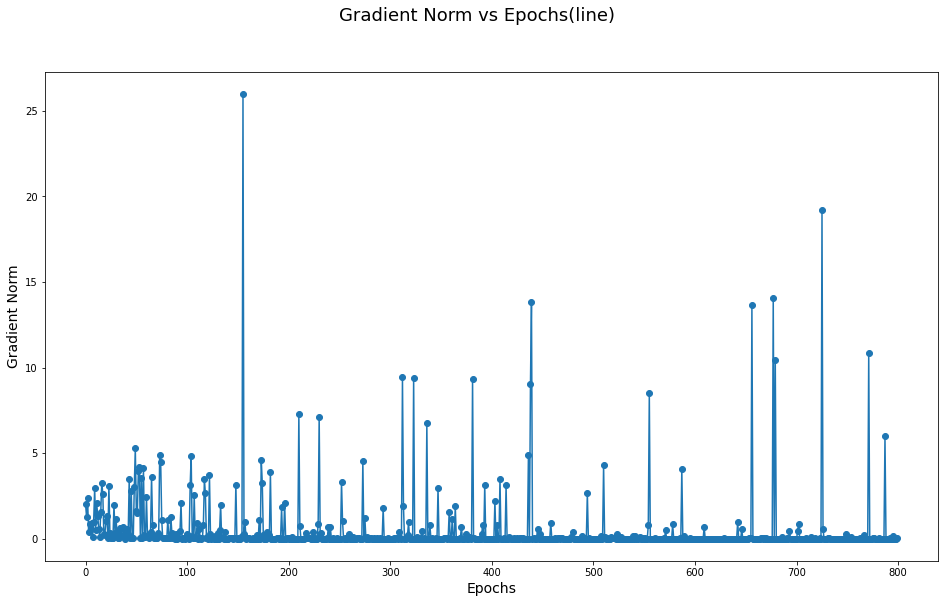

In [ ]:
x = np.arange(len(gradien_vector))
fig = plt.gcf()
fig.set_size_inches(16, 9)
fig.suptitle('Gradient Norm vs Epochs(line)', fontsize=18)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Gradient Norm', fontsize=14)
plt.scatter(x,gradien_vector)
plt.plot(x,gradien_vector)
plt.savefig('Gradient_norm(line plot) vs Epochs.pdf')

files.download("Gradient_norm(line plot) vs Epochs.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

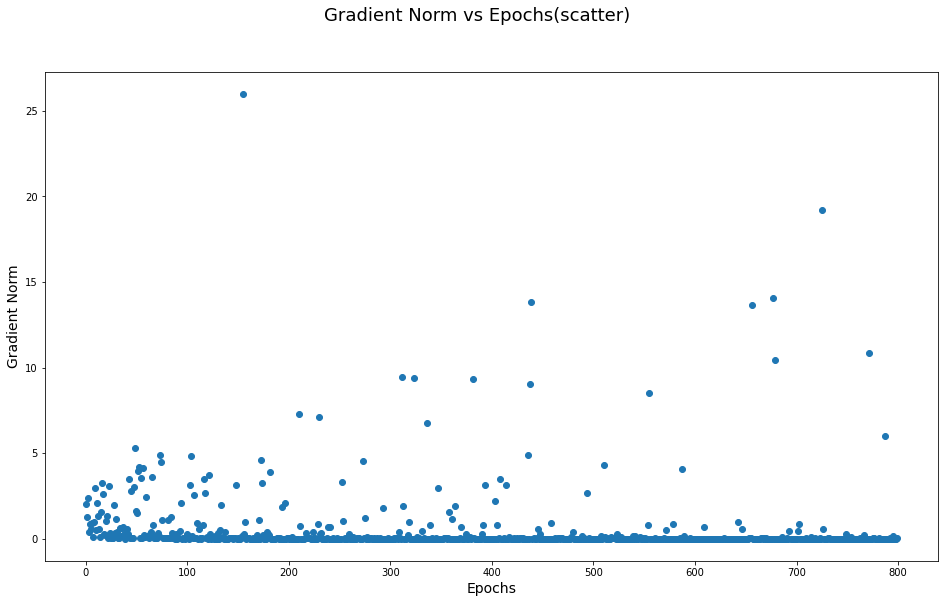

In [ ]:
x = np.arange(len(gradien_vector))
fig = plt.gcf()
fig.set_size_inches(16, 9)
fig.suptitle('Gradient Norm vs Epochs(scatter)', fontsize=18)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Gradient Norm', fontsize=14)
plt.scatter(x,gradien_vector)
plt.savefig('scatterplot_gradient norm vs Epochs.pdf')
files.download("scatterplot_gradient norm vs Epochs.pdf") 